<a href="https://colab.research.google.com/github/LuisCSGuimaraes/Portifolio/blob/main/Analisando_os_Dados_de_Ottawa_Canada_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="100%" src="https://raw.githubusercontent.com/LuisCSGuimaraes/Portifolio/main/banner.jpg">

<a href="http://www.freepik.com">Designed by starline / Freepik</a>

---

# Análise dos Dados do Airbnb - Ottawa / Canada

Esta análise tem por objetivo extrair insights a partir de dados públicos disponibilizados pelo [Airbnb](https://www.airbnb.com.br/), que é considerada a **maior empresa hoteleira da atualidade**, mesmo **não possuindo nehum hotel**!

A Startup, fundada em 2008, conecta pessoas que querem viajar e se hospedar com anfitriões que querem alugar seus imóveis de maneira prática através de uma plataforma inovadora. Esse novo modelo de negócios desafia as redes hoteleiras tradicionais, tanto que, em 2018, o [Airbnb](https://www.airbnb.com.br/) já havia **hospedado mais de 300 milhões** de pessoas ao redor do mundo

Os dados aqui exibidos foram retirados do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook* iremos analisar, de forma bem simples, os dados referentes à cidade de Ottawa, no Canada, e ver quais insights podem ser extraídos a partir de dados brutos disponibilizados.**

**Por ser uma análise simples e apenas inicial dos dados, não foram realizados trabalhos mais complexos de tratamento e nem foram considerados possíveis *outliers*.**

## Obtenção dos Dados

Os dados utilizados neste notebook foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

A intenção é realizar uma análise exploratória inicial, por isso apenas o arquivo abaixo será baixado:

* `listings.csv` - *Summary information and metrics for listings in Ottawa (good for visualisations).*

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/on/ottawa/2020-12-20/visualisations/listings.csv")

## Análise dos Dados

Esta etapa inicial nos dará uma conciência e um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**
* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,34220,Room available,147438,Mark,NaN,Capital,45.40924,-75.67900,Private room,202,7,0,NaN,NaN,1,0
1,36642,City Conveniences A Country Setting,157787,Donna,NaN,Kitchissippi,45.40159,-75.74679,Private room,65,3,87,2020-02-17,0.68,1,233
2,59258,Lower level of my house to rent,284351,Elena,NaN,Bay,45.35900,-75.80314,Entire home/apt,200,3,1,2011-07-04,0.01,1,0
3,158824,DOWNTOWN/GLEBE HOUSE WITH BACKYARD,87296,Luc,NaN,Capital,45.40248,-75.69941,Entire home/apt,140,3,7,2015-08-30,0.06,1,0
4,261065,Westboro Village Executive Suite,1369632,Glenn,NaN,Kitchissippi,45.38972,-75.75496,Entire home/apt,150,3,64,2020-10-19,0.58,1,322


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Agora, identificaremos a quantidade de entradas que nosso dataset possui e veremos quais os tipos de dados de cada coluna.

In [8]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	2693
Variáveis:	16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Precisamos verificar a quantidade de valores ausentes no dataset para sabermos se estes são significativos quando comparados ao total de entradas. 
* Vemos que a coluna `neighbourhood_group` possui 100% dos seus valores ausentes e não deve ser considerada;
* As colunas `reviews_per_month` e `last_review` possuem aproximadamente 16,6% dos seus valores nulos.

In [9]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.166729
last_review                       0.166729
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Verificaremos a distribuição das variáveis através do histograma.

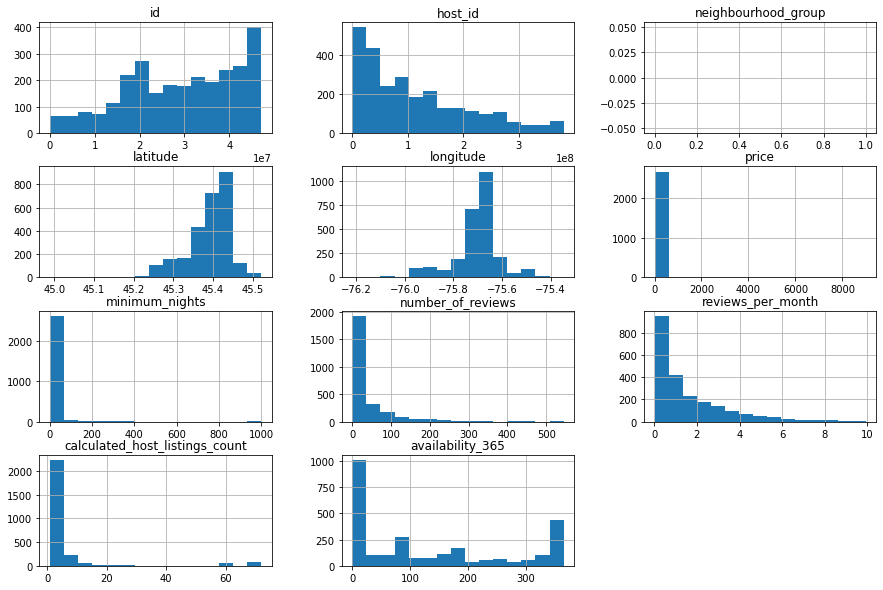

In [11]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**
Veremos agora qual é a média de preços de aluguel dos imóveis da cidade.

In [13]:
# ver a média da coluna `price``
df.price.mean()

123.65874489417007

### **Q4. Qual a correlação existente entre as variáveis**
Iremos agora medir a correlação existente entre as variáveis, para isso utilizaremos a matriz de correlação e o mapa de calor.
Essas ferramentas nos ajudarão a entender qual é a intensidade da correlação entre as variáveis do dataset através do *coeficiente de correlação*.

In [16]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.079380,0.007159,-0.003470,-0.011089,0.005839
minimum_nights,0.079380,1.000000,-0.004522,-0.041087,0.009099,0.057460
number_of_reviews,0.007159,-0.004522,1.000000,0.752552,-0.057256,0.035762
reviews_per_month,-0.003470,-0.041087,0.752552,1.000000,0.063043,0.130210
calculated_host_listings_count,-0.011089,0.009099,-0.057256,0.063043,1.000000,0.008061
availability_365,0.005839,0.057460,0.035762,0.130210,0.008061,1.000000


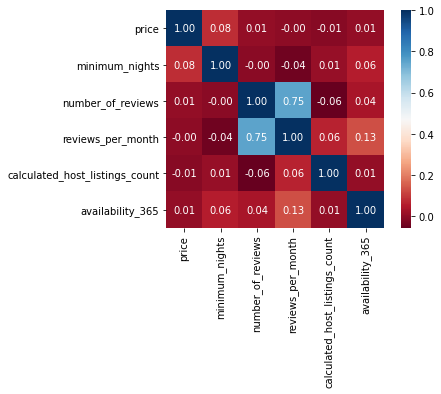

In [17]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**
Aqui iremos contar a quantidade de cada tipo de acomodação disponível na cidade, utilizando o `value_counts()`. Essa informação está disponível na coluna `room_type`.

Além disso também iremos calcular a porcentagem de cada tipo de acomodação.

In [18]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    1623
Private room       1042
Shared room          22
Hotel room            6
Name: room_type, dtype: int64

In [19]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.602674
Private room       0.386929
Shared room        0.008169
Hotel room         0.002228
Name: room_type, dtype: float64

Percebemos que a maior parte das acomodações são do tipo `Entire home/apt`, tendo um total de aproximadamente **60%** dos alugueis disponíveis. Em segundo lugar, com **38,6%**, temos as acomodações do tipo `Private room`. Em terceiro temos as acomodações `Shared room`, com **8%** e com apenas **2%** do total de alugueis disponíveis, temos as acomodações do tipo `Hotel room`.

### **Q6. Qual a localidade mais cara do dataset?**
Aqui, iremos utilizar o `groupby()` para comparar os bairros (*neighbourhoods*) a partir do preço de locação para descobrir qual a localidade mais cara de Ottawa.

In [21]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Barrhaven                  180.578947
West Carleton-March        172.617021
Capital                    170.983784
Somerset                   157.595361
Gloucester-South Nepean    154.697368
Kitchissippi               127.851852
Rideau-Goulbourn           125.888889
River                      123.414062
Osgoode                    118.560000
Rideau-Vanier              116.055453
Bay                        107.843373
Kanata South               105.649123
Alta Vista                 104.930000
Rideau-Rockcliffe          104.537313
Stittsville-Kanata West    104.272727
College                    104.110000
Knoxdale-Merivale           96.300000
Cumberland                  93.738462
Orleans                     93.280702
Kanata North                90.833333
Beacon Hill-Cyrville        90.696970
Gloucester-Southgate        82.697674
Innes                       69.216216
Name: price, dtype: float64

O dataset inclui as informações de latitude e longitude, com isso podemos plotar cada ponto e visualizar onde ocorre a maior concentração de imóveis disponíveis para aluguel. Para isso, considera-se `x = longitude` e `y = latitude`.

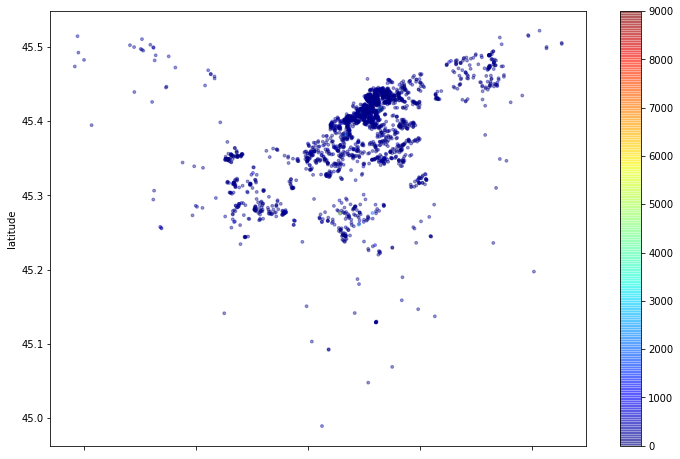

In [23]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'],s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
Veremos qual é a média do mínimo de noites das acomodações disponíveis para aluguel.

In [24]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

10.633865577422949

## Conclusões


Realizamos uma análise bem superficial e simples dos dados, porém já é possível retirar alguns insights, como:
* A maior parte das acomodações disponíveis são do tipo Apartamento/Casa completa (`Entire home/apt`), representando **60%** do total;
* As acomodações mais caras também são as que estão localizadas mais no centro da cidade, mais precisamente nas redondezas do bairro de **Barrhaven**;

Outros insights precisariam de uma quantidade maior de atributos e uma análise mais aprofundada, com uma limpeza dos possíveis *outliers* existentes.